<a href="https://colab.research.google.com/github/Shavedha/WDM_EXP7/blob/main/WDM_E_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Node 0: Authority Score = 0.8165, Hub Score = 0.5774
Node 1: Authority Score = 0.4082, Hub Score = 0.5774
Node 2: Authority Score = 0.4082, Hub Score = 0.5774


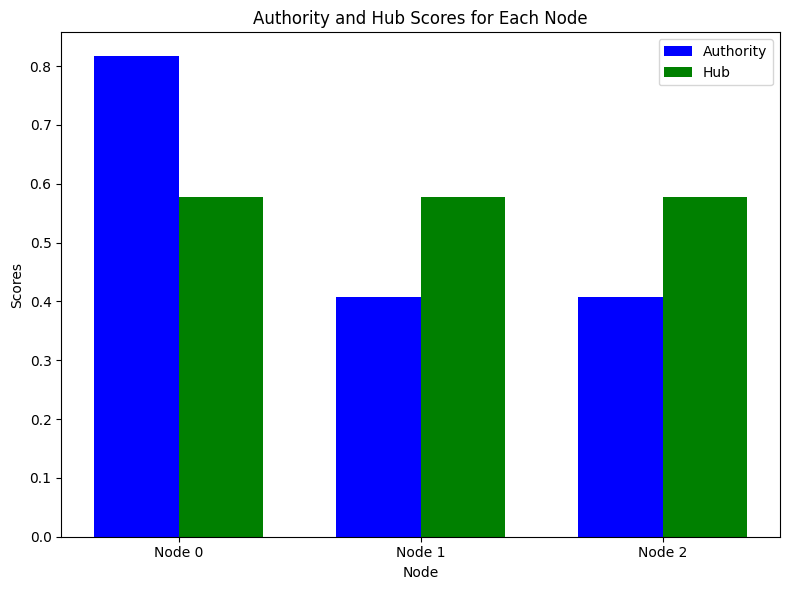

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def hits_algorithm(adjacency_matrix, max_iterations=100, tol=1.0e-6):
    num_nodes = len(adjacency_matrix)
    authority_scores = np.ones(num_nodes)
    hub_scores = np.ones(num_nodes)

    for i in range(max_iterations):
        # Authority update
        new_authority_scores = np.dot(adjacency_matrix.T, hub_scores)
        new_authority_scores /= np.linalg.norm(new_authority_scores, ord=2)  # Normalizing

        # Hub update
        new_hub_scores = np.dot(adjacency_matrix, new_authority_scores)
        new_hub_scores /= np.linalg.norm(new_hub_scores, ord=2)  # Normalizing

        # Check convergence
        authority_diff = np.linalg.norm(new_authority_scores - authority_scores, ord=2)
        hub_diff = np.linalg.norm(new_hub_scores - hub_scores, ord=2)

        if authority_diff < tol and hub_diff < tol:
            break

        authority_scores = new_authority_scores
        hub_scores = new_hub_scores

    return authority_scores, hub_scores

# Example adjacency matrix (replace this with your own data)
# For simplicity, using a random adjacency matrix
adj_matrix = np.array([
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 0]
])

# Run HITS algorithm
authority, hub = hits_algorithm(adj_matrix)
for i in range(len(authority)):
    print(f"Node {i}: Authority Score = {authority[i]:.4f}, Hub Score = {hub[i]:.4f}")

# bar chart of authority vs hub scores

nodes = np.arange(len(authority))
bar_width = 0.35
plt.figure(figsize=(8, 6))
plt.bar(nodes - bar_width/2, authority, bar_width, label='Authority', color='blue')
plt.bar(nodes + bar_width/2, hub, bar_width, label='Hub', color='green')
plt.xlabel('Node')
plt.ylabel('Scores')
plt.title('Authority and Hub Scores for Each Node')
plt.xticks(nodes, [f'Node {i}' for i in nodes])
plt.legend()
plt.tight_layout()
plt.show()